In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = "/content/cosmetics.csv"
df = pd.read_csv(file_path)


In [3]:
display(df.head())

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [4]:
mean_value = df['Price'].mean()
median_value = df['Price'].median()
mode_value = df['Price'].mode()[0]
std_dev = df['Price'].std()
variance = df['Price'].var()

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}, Std Dev: {std_dev}, Variance: {variance}")


Mean: 55.58423913043478, Median: 42.5, Mode: 38, Std Dev: 45.014428945492625, Variance: 2026.2988132888045


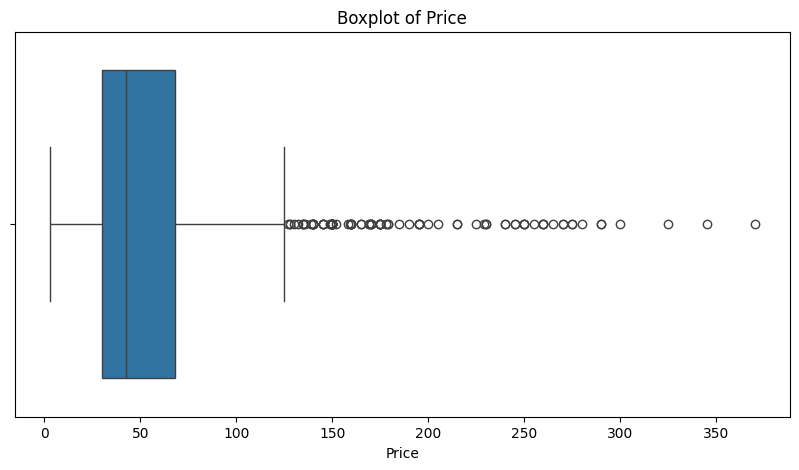

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Price")
plt.show()

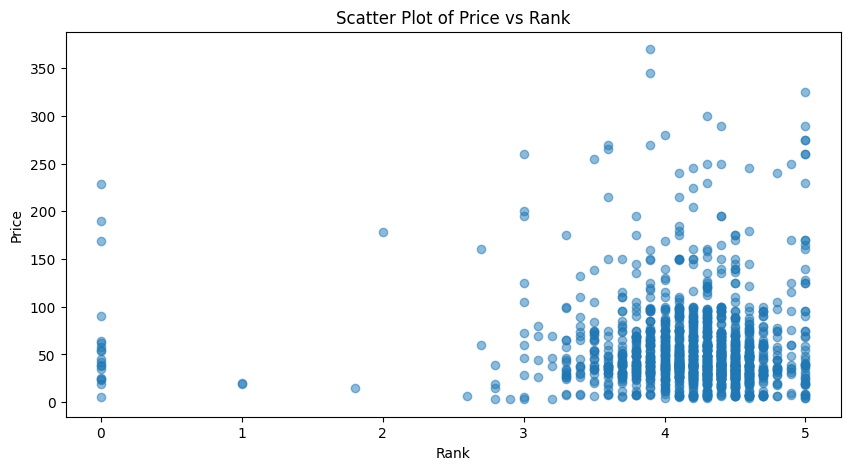

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df['Rank'], df['Price'], alpha=0.5)
plt.xlabel("Rank")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs Rank")
plt.show()

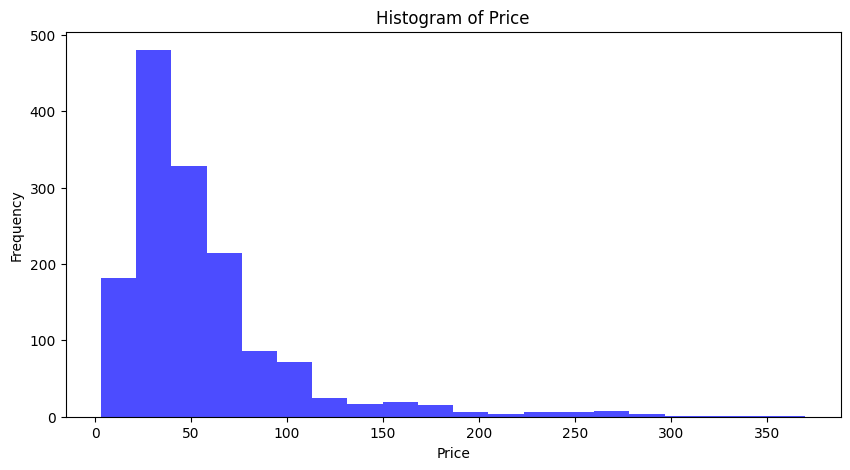

In [9]:
plt.figure(figsize=(10,5))
plt.hist(df['Price'], bins=20, color='blue', alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()

In [7]:
X = df[['Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse:.2f}, R2 Score = {r2:.2f}")


Linear Regression: MSE = 2043.46, R2 Score = 0.00
Decision Tree: MSE = 2643.72, R2 Score = -0.29
Random Forest: MSE = 2291.40, R2 Score = -0.12
